<a href="https://colab.research.google.com/github/Launcha10/sports_entertaiment_topic_analysis/blob/hayashi-test/travel3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
!apt install aptitude
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
!pip install mecab-python3==0.7

!pip install gensim
!pip install wordcloud 
!pip install pyLDAvis

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  aptitude-common libcgi-fast-perl libcgi-pm-perl libclass-accessor-perl
  libcwidget3v5 libencode-locale-perl libfcgi-perl libhtml-parser-perl
  libhtml-tagset-perl libhttp-date-perl libhttp-message-perl libio-html-perl
  libio-string-perl liblwp-mediatypes-perl libparse-debianchangelog-perl
  libsigc++-2.0-0v5 libsub-name-perl libtimedate-perl liburi-perl libxapian30
Suggested packages:
  aptitude-doc-en | aptitude-doc apt-xapian-index debtags tasksel
  libcwidget-dev libdata-dump-perl libhtml-template-perl libxml-simple-perl
  libwww-perl xapian-tools
The following NEW packages will be installed:
  aptitude aptitude-common libcgi-fast-perl libcgi-pm-perl
  libclass-accessor-perl libcwidget3v5 libencode-l

In [0]:
import MeCab

In [3]:
tagger = MeCab.Tagger("-Owakati")
sample = "私はご飯を食べました"
print(tagger.parse(sample))

私 は ご飯 を 食べ まし た 



In [0]:
import glob
import numpy as np
import random
from tqdm import tqdm
import math
import MeCab
import urllib
import gensim
import pyLDAvis
import pyLDAvis.gensim
from wordcloud import WordCloud
from PIL import Image
import matplotlib
import matplotlib.pylab as plt

from gensim import corpora, models, matutils

np.random.seed(0)
FONT = "/content/drive/My Drive/ernie/travel_data/font/ipag.ttf"

In [0]:
# paths to textss
text_paths = glob.glob('/content/drive/My Drive/ernie/travel_data/new_text/**/*.txt')

# define stop words
req = urllib.request.Request('http://svn.sourceforge.jp/svnroot/slothlib/CSharp/Version1/SlothLib/NLP/Filter/StopWord/word/Japanese.txt')
with urllib.request.urlopen(req) as res:
    stopwords = res.read().decode('utf-8').split('\r\n')
while '' in stopwords:
    stopwords.remove('')

In [0]:
def analyzer(text, mecab, stopwords=[], target_part_of_speech=['proper_noun', 'noun', 'verb', 'adjective']):

    node = mecab.parseToNode(text)
    words = []

    while node:

        features = node.feature.split(',')
        surface = features[6]

        if (surface == '*') or (len(surface) < 2) or (surface in stopwords):
            node = node.next
            continue

        noun_flag = (features[0] == '名詞')
        proper_noun_flag = (features[0] == '名詞') & (features[1] == '固有名詞')
        verb_flag = (features[0] == '動詞') & (features[1] == '自立')
        adjective_flag = (features[0] == '形容詞') & (features[1] == '自立')


        if ('proper_noun' in target_part_of_speech) & proper_noun_flag:
            words.append(surface)
        elif ('noun' in target_part_of_speech) & noun_flag:
            words.append(surface)
        elif ('verb' in target_part_of_speech) & verb_flag:
            words.append(surface)
        elif ('adjective' in target_part_of_speech) & adjective_flag:
            words.append(surface)

        node = node.next

    return words

In [0]:
import re
#無関係なワード削除
def format_text(text):

    text=re.sub(r'https?://[\w/:%#\$&\?\(\)~\.=\+\-…]+', "", text)
    #text=re.sub('投稿', "", text)
    text=re.sub(r'[!-~]', "", text)#半角記号,数字,英字
    text=re.sub(r'[︰-＠]', "", text)#全角記号
    #text=re.sub('\n', " ", text)#改行文字

    return text

In [77]:
# make dictionary and corpus
mecab = MeCab.Tagger('-Owakati')
titles = []
texts = []
for text_path in text_paths:
    print(text_path)
    
    text = open(text_path, 'r').read()
    text = text.split('\n')
    title = text[2]
    text = ' '.join(text[3:])
    #print(text)
    format_words = format_text(text)
    words = analyzer(format_words, mecab, stopwords=stopwords, target_part_of_speech=['noun', 'proper_noun'])
    #print(words)
    texts.append(words)
    #print(texts)

dictionary = gensim.corpora.Dictionary(texts)
print(dictionary.token2id)
dictionary.filter_extremes(no_below=3, no_above=0.5)
print(dictionary)
corpus = [dictionary.doc2bow(t) for t in texts]
print(corpus)

/content/drive/My Drive/ernie/travel_data/new_text/new_text2/new_text18.txt
/content/drive/My Drive/ernie/travel_data/new_text/new_text2/new_text19.txt
/content/drive/My Drive/ernie/travel_data/new_text/new_text2/new_text20.txt
/content/drive/My Drive/ernie/travel_data/new_text/new_text2/new_text21.txt
/content/drive/My Drive/ernie/travel_data/new_text/new_text2/new_text22.txt
/content/drive/My Drive/ernie/travel_data/new_text/new_text2/new_text23.txt
/content/drive/My Drive/ernie/travel_data/new_text/new_text2/new_text24.txt
/content/drive/My Drive/ernie/travel_data/new_text/new_text2/new_text25.txt
/content/drive/My Drive/ernie/travel_data/new_text/new_text2/new_text26.txt
/content/drive/My Drive/ernie/travel_data/new_text/new_text2/new_text27.txt
/content/drive/My Drive/ernie/travel_data/new_text/new_text2/new_text28.txt
/content/drive/My Drive/ernie/travel_data/new_text/new_text2/new_text29.txt
/content/drive/My Drive/ernie/travel_data/new_text/new_text2/new_text30.txt
/content/dri

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [74]:
print(len(corpus))

377


In [12]:
#bowではなく、tfidfを試す
"""

import os
import gc
import logging
import pickle
from smart_open import open

# tfidf
tfidf = gensim.models.TfidfModel(corpus)
tfidf.save('model.tfidf')

# make corpus_tfidf
corpus_tfidf = tfidf[corpus]

# save corpus_tfidf
with open("corpus_tfidf.pkl",'wb') as f:
    pickle.dump(corpus_tfidf,f)

print(corpus_tfidf)

"""

'\n\nimport os\nimport gc\nimport logging\nimport pickle\nfrom smart_open import open\n\n# tfidf\ntfidf = gensim.models.TfidfModel(corpus)\ntfidf.save(\'model.tfidf\')\n\n# make corpus_tfidf\ncorpus_tfidf = tfidf[corpus]\n\n# save corpus_tfidf\nwith open("corpus_tfidf.pkl",\'wb\') as f:\n    pickle.dump(corpus_tfidf,f)\n\nprint(corpus_tfidf)\n\n'

In [0]:
# KL divergenceの定義と描画
def calc_topic_distances(m, topic):
    import numpy as np

    def kldiv(p, q):
        distance = np.sum(p * np.log(p / q))
        return distance

    # get probability of each words
    # https://github.com/piskvorky/gensim/blob/develop/gensim/models/ldamodel.py#L733

    t = m.state.get_lambda()
    for i, p in enumerate(t):
        t[i] = t[i] / t[i].sum()

    base = t[topic]
    distances = [(i_p[0], kldiv(base, i_p[1])) for i_p in enumerate(t) if i_p[0] != topic]
    return distances

def plot_distance_matrix(m):
    import numpy as np
    import matplotlib.pylab as plt

    # make distance matrix
    mt = []
    for i in range(m.num_topics):
        d = calc_topic_distances(m, i)
        d.insert(i, (i, 0))  # distance between same topic
        d = [_d[1] for _d in d]
        mt.append(d)

    mt = np.array(mt)

    # plot matrix
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_aspect("equal")
    plt.imshow(mt, interpolation="nearest", cmap=plt.cm.ocean)
    plt.yticks(range(mt.shape[0]))
    plt.xticks(range(mt.shape[1]))
    plt.colorbar()
    plt.savefig("./kldiv.png")

In [0]:
#warningを無視する
import warnings
warnings.filterwarnings('ignore')

# LDA
num_topics = 20

"""
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus_tfidf,
                                            id2word=dictionary,
                                            num_topics=num_topics,
                                            random_state=0)
"""


lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary,
                             num_topics=num_topics, minimum_probability=0.001,
                             passes=20, update_every=0, chunksize=10000, random_state=1)


In [15]:
"""
# KL divergence
plot_distance_matrix(lda_model)

# Visualize
ncols = math.ceil(num_topics/2)
nrows = math.ceil(lda_model.num_topics/ncols)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(15,3))
axs = axs.flatten()

def color_func(word, font_size, position, orientation, random_state, font_path):
    return 'darkturquoise'

for i, t in enumerate(range(lda_model.num_topics)):

    x = dict(lda_model.show_topic(t, 30))
    im = WordCloud(
        font_path=FONT,
        background_color='white',
        color_func=color_func,
        random_state=0
    ).generate_from_frequencies(x)
    axs[i].imshow(im)
    axs[i].axis('off')
    axs[i].set_title('Topic '+str(t))

plt.tight_layout()
plt.savefig("./visualize.png")
"""

'\n# KL divergence\nplot_distance_matrix(lda_model)\n\n# Visualize\nncols = math.ceil(num_topics/2)\nnrows = math.ceil(lda_model.num_topics/ncols)\nfig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(15,3))\naxs = axs.flatten()\n\ndef color_func(word, font_size, position, orientation, random_state, font_path):\n    return \'darkturquoise\'\n\nfor i, t in enumerate(range(lda_model.num_topics)):\n\n    x = dict(lda_model.show_topic(t, 30))\n    im = WordCloud(\n        font_path=FONT,\n        background_color=\'white\',\n        color_func=color_func,\n        random_state=0\n    ).generate_from_frequencies(x)\n    axs[i].imshow(im)\n    axs[i].axis(\'off\')\n    axs[i].set_title(\'Topic \'+str(t))\n\nplt.tight_layout()\nplt.savefig("./visualize.png")\n'

In [16]:
# WordCloud2
"""
plt.figure(figsize=(30, 30))
for t in range(lda_model.num_topics):
    plt.subplot(5, 4, t+1)
    x = dict(lda_model.show_topic(t, 200))
    im = WordCloud(font_path=FONT).generate_from_frequencies(x)
    plt.imshow(im)
    plt.axis("off")
    plt.title("Topic #" + str(t))

plt.savefig("./visualize2.png")
"""

'\nplt.figure(figsize=(30, 30))\nfor t in range(lda_model.num_topics):\n    plt.subplot(5, 4, t+1)\n    x = dict(lda_model.show_topic(t, 200))\n    im = WordCloud(font_path=FONT).generate_from_frequencies(x)\n    plt.imshow(im)\n    plt.axis("off")\n    plt.title("Topic #" + str(t))\n\nplt.savefig("./visualize2.png")\n'

In [17]:
# pyLDAvis
"""
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary, sort_topics=False)
pyLDAvis.save_html(vis, './pyldavis_output.html')
"""

"\nvis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary, sort_topics=False)\npyLDAvis.save_html(vis, './pyldavis_output.html')\n"

In [18]:
# Vis t-SNE
"""
vis_tsne = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary, mds='tsne', sort_topics=False)
vis_tsne

# save as html
pyLDAvis.save_html(vis_tsne, 'pyldavis_output_tsne.html')
"""

"\nvis_tsne = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary, mds='tsne', sort_topics=False)\nvis_tsne\n\n# save as html\npyLDAvis.save_html(vis_tsne, 'pyldavis_output_tsne.html')\n"

In [72]:
# output tags in topics
for x in lda_model.show_topics(-1, 20):
    print(x)
print(type(x))

(0, '0.012*"長崎" + 0.009*"博多" + 0.008*"スタンダード" + 0.006*"松島" + 0.006*"尾道" + 0.005*"名古屋" + 0.004*"浴場" + 0.004*"金沢" + 0.004*"仙台" + 0.004*"天神" + 0.004*"塩釜" + 0.003*"夕食" + 0.003*"札幌" + 0.003*"和室" + 0.003*"東武" + 0.003*"つくば" + 0.003*"都営" + 0.003*"ハウステンボス" + 0.003*"和洋" + 0.003*"田原"')
(1, '0.002*"小門" + 0.002*"スティーブン" + 0.001*"平素" + 0.001*"むやみ" + 0.000*"長崎" + 0.000*"博多" + 0.000*"税込" + 0.000*"買いもの" + 0.000*"スタンダード" + 0.000*"天神" + 0.000*"松島" + 0.000*"水族館" + 0.000*"名古屋" + 0.000*"塩釜" + 0.000*"尾道" + 0.000*"感染" + 0.000*"仙台" + 0.000*"都営" + 0.000*"札幌" + 0.000*"金沢"')
(2, '0.011*"買いもの" + 0.005*"五反田" + 0.004*"棚田" + 0.004*"西京" + 0.004*"火曜日" + 0.004*"美山" + 0.003*"香水" + 0.003*"星空" + 0.002*"秘境" + 0.002*"ほっぺ" + 0.002*"くど" + 0.002*"愛子" + 0.002*"登山" + 0.002*"上京" + 0.002*"上ル" + 0.002*"万年筆" + 0.002*"山頂" + 0.002*"スウェーデン" + 0.002*"水曜" + 0.002*"高原"')
(3, '0.015*"草津" + 0.011*"新潟" + 0.009*"有松" + 0.006*"浜名湖" + 0.006*"たこ焼き" + 0.006*"梅田" + 0.006*"鹿児島" + 0.006*"浜松" + 0.006*"地獄" + 0.005*"富山" + 0.005*"長岡" + 0.005*"テディベア" + 0.0

(19, 0.94397426)
(19, 0.83397996)
(18, 0.6225719)
(13, 0.46455893)
(14, 0.5506282)
(2, 0.9996509)
(15, 0.6527831)
(2, 0.44166005)
(2, 0.77017474)
(2, 0.93499935)
(2, 0.7294842)
(2, 0.9995384)
(13, 0.9917901)
(14, 0.99968874)
(18, 0.88415045)
(18, 0.84129024)
(19, 0.983279)
(2, 0.9804262)
(11, 0.96444875)
(18, 0.50124395)
(16, 0.9996928)
(3, 0.6661613)
(18, 0.786839)
(18, 0.8501798)
(18, 0.52424437)
(15, 0.528739)
(18, 0.6061861)
(19, 0.3592982)
(4, 0.9997084)
(18, 0.8201469)
(19, 0.74558574)
(18, 0.8737914)
(11, 0.99871206)
(18, 0.8005347)
(15, 0.62912005)
(14, 0.4980811)
(14, 0.5032117)
(18, 0.9996957)
(18, 0.6039708)
(18, 0.58107674)
(18, 0.9191885)
(14, 0.55356187)
(3, 0.5069082)
(11, 0.9995936)
(18, 0.48819268)
(18, 0.5904706)
(2, 0.99955505)
(2, 0.9245543)
(11, 0.6108094)
(14, 0.5580337)
(14, 0.8421668)
(14, 0.51973015)
(13, 0.9995217)
(2, 0.9940662)
(2, 0.75709325)
(14, 0.9997202)
(14, 0.7636371)
(14, 0.84622586)
(18, 0.4004859)
(18, 0.7472924)
(14, 0.38106173)
(19, 0.92595345)
(

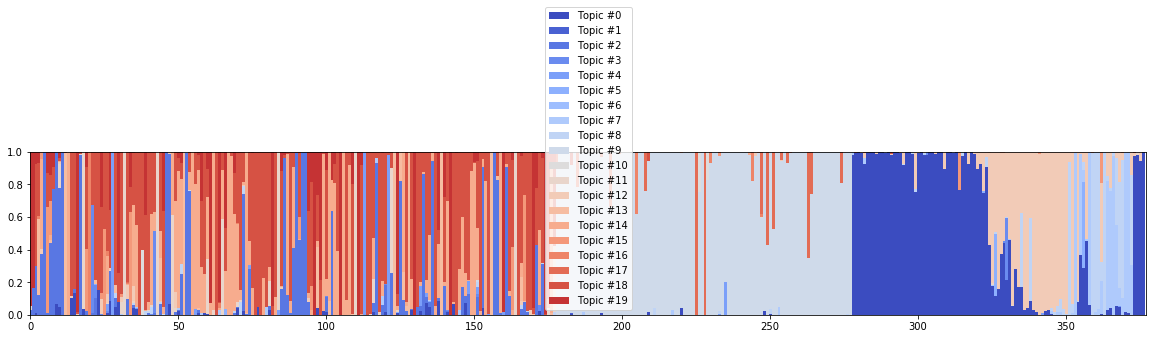

In [97]:
def show_document_topics(c, m, sample_size=10, width=1):
    import random
    import numpy as np
    import matplotlib.pylab as plt

    # make document/topics matrix
    d_topics = []
    t_documents = {}
    use_max_topic = []
    #samples = random.sample(range(len(c)), sample_size)
    for i in range(0, 377):
        samples = [i]
        for s in samples:
            ts = m.__getitem__(corpus[s], -1)
            d_topics.append([v[1] for v in ts])
            max_topic = max(ts, key=lambda x: x[1])
            print(max_topic)

            use_max_topic.append(max_topic[0])
            
            if max_topic[0] not in t_documents:
                t_documents[max_topic[0]] = []
            t_documents[max_topic[0]] += [(s, max_topic[1])]

    print(samples)    
    print(type(samples))
    
    d_topics = np.array(d_topics)
    
    for t in t_documents:
        t_documents[t] = sorted(t_documents[t], key=lambda x: x[1], reverse=True)
    
    # draw cumulative bar chart
    fig = plt.figure(figsize=(20, 3))
    N, K = d_topics.shape
    indices = np.arange(N)
    height = np.zeros(N)
    bar = []
    for k in range(K):
        color = plt.cm.coolwarm(k / K, 1)
        p = plt.bar(indices, d_topics[:, k], width, bottom=None if k == 0 else height, color=color)
        height += d_topics[:, k]
        bar.append(p)
    
    
    plt.ylim((0, 1))
    plt.xlim((0, d_topics.shape[0]))
    topic_labels = ['Topic #{}'.format(k) for k in range(K)]
    plt.legend([b[0] for b in bar], topic_labels)
    plt.show(bar)
    
    return d_topics, t_documents, use_max_topic
    
document_topics, topic_documents, use_max_topic = show_document_topics(corpus, lda_model)

In [27]:
"""
#0~19トピックの頻出語を20個抽出する

for i in range(0, 20):
    exec("t_words" + str(i) + "= []")
    exec("t_words%d = lda_model.show_topic(i, 20)" % (i))

print(t_words2)
"""

[('倉敷', 0.007087891), ('梅林', 0.004809024), ('軽井沢', 0.0038061435), ('松本', 0.003443451), ('金沢', 0.00310948), ('新潟', 0.002595833), ('見頃', 0.0025816269), ('スペイン', 0.0023173715), ('たぬき', 0.0022618936), ('美観', 0.0022483035), ('教会', 0.002168357), ('手土産', 0.002135517), ('銭湯', 0.002129149), ('沖縄', 0.002121299), ('草津', 0.0020979205), ('宇治', 0.0020792256), ('わん', 0.0020321526), ('安曇', 0.0019751245), ('イルミネーション', 0.0019698914), ('マーケット', 0.0019631684)]


In [0]:
"""
#無関係なワード削除
def format_text2(text):

    text=re.sub(r'https?://[\w/:%#\$&\?\(\)~\.=\+\-…]+', "", text)
    #text=re.sub('投稿', "", text)
    #text=re.sub(r'\W', "", text)#英数字以外
    #text=re.sub(r'\A', "", text)#文字列の先頭
    #text=re.sub(r'\Z', "", text)#文字列の最後尾
    text=re.sub(r'[!-~]', "", text)#半角記号,数字,英字
    text=re.sub(r'[︰-＠]', "", text)#全角記号
    #text=re.sub('\n', " ", text)#改行文字

    return text
"""

In [0]:
"""
#文章から数字等を削除する

for i in range(0,20):
    exec("tt_words%d = ','.join(map(str, t_words%d))" % (i, i))
    exec("topic_words" + str(i) + "= []")
    exec("tw%d = format_text2(tt_words%d)" % (i, i))
    exec("topic_words%d = tw%d.split()" % (i, i))

print(topic_words0)
"""

In [0]:
"""
#各トピックの特徴語をカウントして特徴ベクトルを作る

for i in range(0, 20):
    exec("tmp += [dictionary.doc2bow(topic_words%d)]"% (i))

print(tmp)

dense = [list(matutils.corpus2dense([tmp[i]], num_terms=len(dictionary)).T[0]) for i in range(0, 20)]

print(dense)
"""

In [102]:
#コーパスに対して特徴ベクトルを作る

dense2 = [list(matutils.corpus2dense([corpus[i]], num_terms=len(dictionary)).T[0]) for i in range(0, 377)]

print(dense2[0:4])
print(len(dense2))

[[2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 4.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 5.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 6.0, 3.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 4.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 6.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 5.0, 3.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 4.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0, 3.0, 3.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 4.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 7.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 2.0, 1.0, 1.0

In [100]:
#正解ラベルを作成する
print(use_max_topic)
print(len(use_max_topic))

377


In [103]:
#機械学習

from sklearn.ensemble import RandomForestClassifier

# トピック0,,,,,,,20の20次元の特徴ベクトル
data_train =  dense2

# 正解のラベル
label_train = use_max_topic  # トピック1~19に分類

estimator = RandomForestClassifier()

# 学習させる
estimator.fit(data_train, label_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [104]:
# 予測
label_predict = estimator.predict(data_train)
print(label_predict)

[19 19 18 13 14  2 15  2  2  2  2  2 13 14 18 18 19  2 11 18 16  3 18 18
 18 15 18 19  4 18 19 18 11 18 15 14 14 18 18 18 18 14  3 11 18 18  2  2
 11 14 14 14 13  2  2 14 14 14 18 18 14 19 14 18 19 11 19 14 14 14 14 18
  2 14 18 18 18 18 18 18 18 18 19 18 11 18  2 14 18 14  2  2  2  2 18 18
 19 13 19 14 18 14  2 14 18 19 14 18 14 18 11 19 18  4 18 18 18  2 18 18
 18  4 11 13 19  2 14 18 13 18 19 18 18  2 18 18  2 18 19 13 18 14 19 18
 18 18 14 18 18 14 14 18 18  2 14 18 13  2  2 14 19  2 18 18 11 18 18 15
 18 18 19  2 18 18 19 18 14 18  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9 17  9  9 17  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9 17  9  9  9  9  9  9  9  9  9  9  9  9  9 17
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 12 12 12 12 12

In [105]:
from sklearn.model_selection import train_test_split

# 6割を学習用、 4割を試験用にする
data_train_s, data_test_s, label_train_s, label_test_s = train_test_split(data_train, label_train, test_size=0.3)

# 学習用に切り出したやつだけで学習
estimator.fit(data_train_s, label_train_s)

# 予測。正解が分かってる場合は、predict関数じゃなくてこうやると、正解率出してくれる
print(estimator.score(data_test_s, label_test_s))

0.6578947368421053
